In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [4]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [5]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0133 - 2s/epoch - 10ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0101 - 457ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0086 - 355ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0073 - 416ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0063 - 360ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0056 - 372ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0051 - 363ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0047 - 349ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0045 - 346ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0045 - 360ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0043 - 353ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0042 - 361ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0041 - 370ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0041 - 351ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0040 - 354ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.0

In [6]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.061 RMSE
Test RMSE: 0.086 RMSE


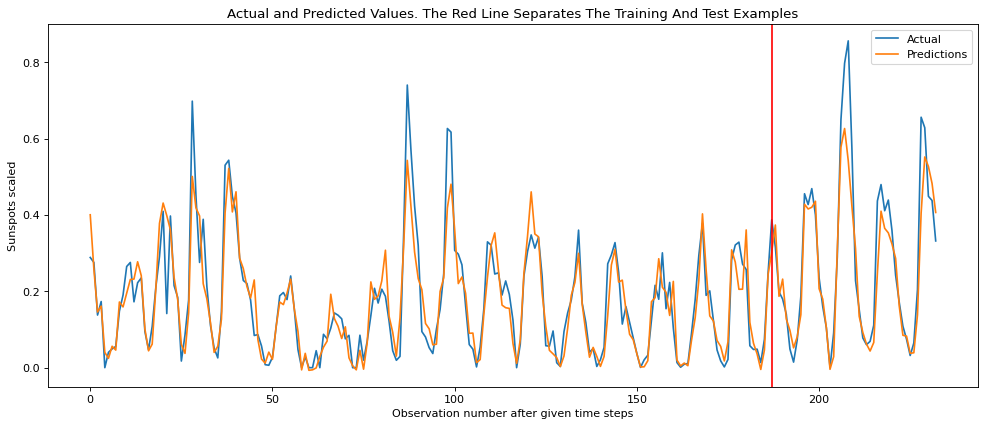

In [7]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)